In [52]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [53]:
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import matplotlib.pyplot as plt
import numpy as np

In [54]:
x_train = train_path = '/content/drive/MyDrive/Food_dataset/train'
x_test = test_path = '/content/drive/MyDrive/Food_dataset/test'

In [55]:
x_train = x_test = ImageDataGenerator(rescale=1/255)

train_batches = x_train.flow_from_directory( train_path, target_size=(224, 224),
                                               batch_size=10, class_mode='categorical')

test_batches = x_test.flow_from_directory(test_path, target_size=(224, 224),
                                                batch_size=10, class_mode='categorical')

Found 110 images belonging to 11 classes.
Found 58 images belonging to 10 classes.


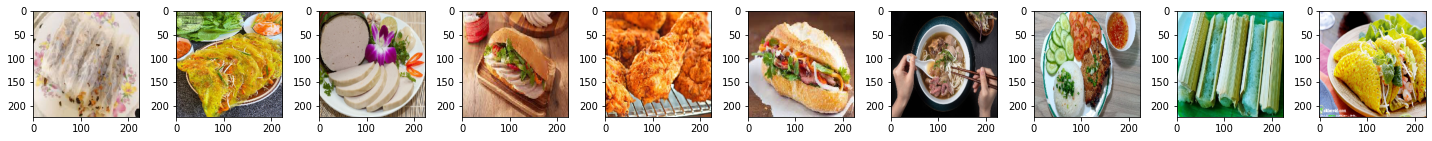

In [56]:
imgs, labels = next(test_batches)
fig, axes = plt.subplots(1, 10, figsize=(20,20))
axes = axes.flatten()

for i, ax in zip( imgs, axes):
  ax.imshow(i)
plt.tight_layout()
plt.show()

In [59]:
model=Sequential([                  
                  Conv2D(32, (3,3), activation='relu', padding = 'same', input_shape=(224,224,3)),
                  MaxPool2D(pool_size=(2,2)),

                  Conv2D(64, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),

                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),
                  Dropout(0.2),

                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  Flatten(), Dropout(0.5),
                  Dense(units=11, activation='softmax') ])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 28, 28, 128)     

In [61]:
model.compile(optimizer = Adam(learning_rate=0.0005),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=train_batches, steps_per_epoch=len(train_batches), 
                    validation_data=test_batches, epochs=10, verbose=1)

Epoch 1/10
11/11 [==============================] - 20s 2s/step - loss: 1.9642 - accuracy: 0.3273 - val_loss: 1.5836 - val_accuracy: 0.5545
Epoch 2/10
11/11 [==============================] - 19s 2s/step - loss: 1.4728 - accuracy: 0.5273 - val_loss: 0.8774 - val_accuracy: 0.7182
Epoch 3/10
11/11 [==============================] - 19s 2s/step - loss: 1.0784 - accuracy: 0.6455 - val_loss: 0.7703 - val_accuracy: 0.7455
Epoch 4/10
11/11 [==============================] - 20s 2s/step - loss: 0.6013 - accuracy: 0.8091 - val_loss: 0.2438 - val_accuracy: 0.9727
Epoch 5/10
11/11 [==============================] - 19s 2s/step - loss: 0.2457 - accuracy: 0.9273 - val_loss: 0.0874 - val_accuracy: 0.9909
Epoch 6/10
11/11 [==============================] - 20s 2s/step - loss: 0.0652 - accuracy: 1.0000 - val_loss: 0.0492 - val_accuracy: 0.9909
Epoch 7/10
11/11 [==============================] - 19s 2s/step - loss: 0.0863 - accuracy: 0.9818 - val_loss: 0.1364 - val_accuracy: 0.9455
Epoch 8/10
11/11 [==

In [62]:
model.save('Food.h5')

In [63]:
classify = load_model('Food.h5')
dic = test_batches.class_indices
dic

{'Banhcuon': 0,
 'Banhmi': 1,
 'Cracked rice': 2,
 'Crispy pancakes': 3,
 'Fried chicken': 4,
 'Grilled bamboo rice': 5,
 'Noodle': 6,
 'Phở': 7,
 'Pork bologna': 8,
 'Spring rolls': 9}

Food Classification Result: ['Spring rolls']


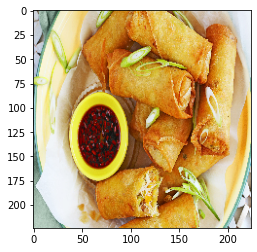

In [73]:
sample = load_img('/content/drive/MyDrive/Food_dataset/train/Spring rolls/roast-pork-spring-rolls-91703-1.jpg', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255

result = np.argmax(classify.predict(sample),axis= 1)
key = [k for k, v in dic.items() if v == result-1]
print('Food Classification Result:', key)